In [44]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

import pickle

In [2]:
df = pd.read_csv("ph_clean_2.csv")

In [3]:
df.head()

,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Uploaded_by_actor,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown,Model_rank,Pornstar_rank,Pornstar_or_model
0,Lana Rhoades,Lana Rhoades is a Virgo born in September of 1...,14000000,903120820,1,26.0,6.0,0.0,1,0,0,1,24,-,6-Sep-96,"Chicago, Illinois, United States of America",-,to Present,1,"Los Angeles, US",0,1,-,0,0,-,1,1,165,52,1,-,3,2,0,121140882.0,192086347,0,Virgo,0,-,-,-,51,-,0.0,1.0,1.0
1,Abella Danger,"Danger might be her last name, but when it com...",868000,862007676,2,3.0,0.0,0.0,1,0,1,1,19,-,1-Jan-01,"Miami, Florida, United States of America",-,to Present,1,"Los Angeles, US",0,1,-,0,0,-,1,1,163,59,1,-,1,1,0,71825882.0,102153809,1,Scorpio,0,-,-,-,17,-,0.0,2.0,1.0
2,Riley Reid,American pornstar Riley Reid was born in May o...,15000000,1074883174,3,157.0,4.0,0.0,1,0,0,1,29,-,9-Jul-91,"Loxahatchee, Florida, United States of America",-,2011 to Present,1,"Los Angeles, US",0,1,-,0,0,-,1,0,163,49,1,-,4,1,0,128389976.0,111081874,1,Cancer,1,-,-,-,111,-,0.0,3.0,1.0
3,Eva Elfie,Hey! I'm a young Siberian girl and I want to p...,12000000,466905043,4,22.0,20.0,0.0,1,0,1,0,20,Russian,27-May-00,Russia,-,2018 to Present,1,"Moscow, RU",0,1,Green,0,0,-,1,0,163,45,1,"Most of all I like playing computer games, but...",2,2,0,16892342.0,91253351,1,Gemini,0,-,"Smart people, shy boys and girls kisses.",-,226,-,0.0,4.0,1.0
4,Mia Malkova,Some girls are so damn hot that they can get y...,11000000,623234336,5,90.0,11.0,0.0,1,0,0,1,28,-,1-Jul-92,"Palm Springs, California, United States of Ame...",-,2012 to Present,1,"Portland, US",0,1,-,0,0,-,1,3,173,54,1,"Masturbating! Seriously, I have a problem! I l...",2,1,0,90190178.0,73577523,0,Gemini,0,"Cocky, Disrespectful, Unhygienic, Immature, Ye...","Sense of Humor, Great Smile, English Accents, ...",-,779,-,0.0,5.0,1.0


In [4]:
mylist = list(df.select_dtypes(include=['object']).columns)
mylist

['Name',
 'Bio',
 'Background',
 'Birthday',
 'Birthplace',
 'Born',
 'Career Start and End',
 'City and Country',
 'Eye Color',
 'Foreskin',
 'Interests and hobbies',
 'Star Sign',
 'Turn Offs',
 'Turn Ons',
 'Video Views',
 'Hometown']

In [5]:
X_prep = df.drop(mylist, axis = 1)
# Transform the data into 2D so we can see
pca = PCA(2) 
X_2D = pca.fit_transform(X_prep)
X_2D

array([[ 9.10281163e+08,  1.75415904e+08],
       [ 8.63685014e+08,  7.69537647e+07],
       [ 1.07859888e+09,  1.09159031e+08],
       ...,
       [-3.82953203e+06,  1.71442833e+04],
       [-3.84669342e+06,  1.89635670e+04],
       [-3.48973150e+06,  1.09897823e+03]])

In [6]:
K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

[1.9083610720266744e+19,
 1.0210737182146787e+19,
 6.02061361600246e+18,
 4.0668868038751473e+18,
 3.034992814251175e+18,
 2.223288628794863e+18,
 1.6721323439297426e+18,
 1.3541247706668298e+18,
 1.1602589303133857e+18,
 9.960611142616786e+17,
 8.434538669896472e+17,
 7.518705238071524e+17,
 6.665066374779539e+17,
 6.067286055204538e+17,
 5.56307927116687e+17,
 5.175764137074585e+17,
 4.716990551101956e+17,
 4.3595217900290995e+17]

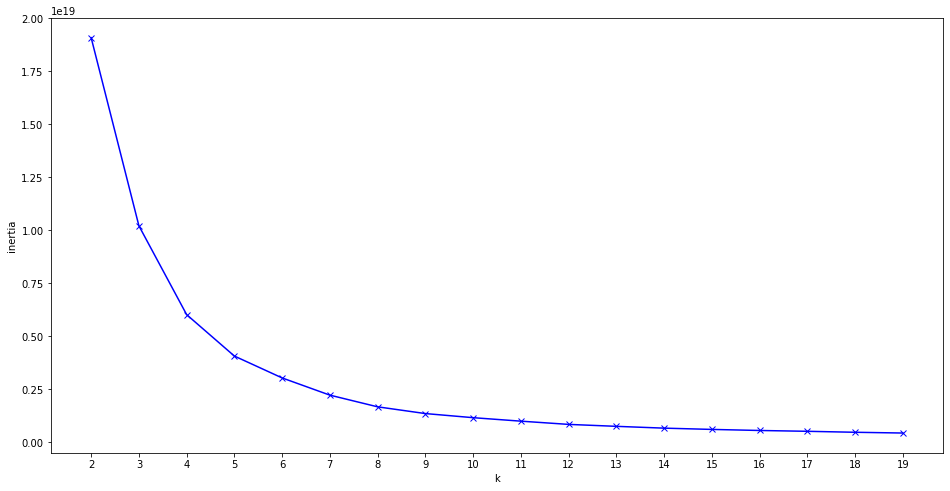

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [8]:
kmeans = KMeans(n_clusters=18, random_state=42)
kmeans.fit(X_2D)

KMeans(n_clusters=18, random_state=42)

In [9]:
clusters = kmeans.predict(X_2D)
clusters

array([14, 14,  7, ...,  0,  0,  0])

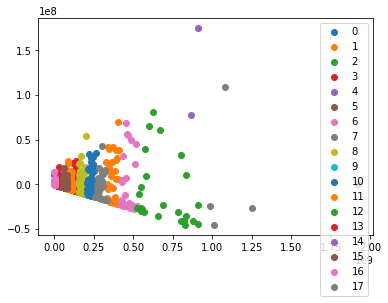

In [10]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

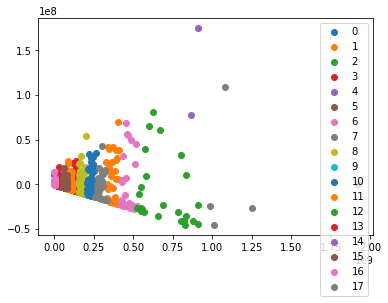

In [11]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [12]:
def find_out(name, df):
    place = df[df['Name']== name].index
    print(place)
    df1 = df.drop(mylist, axis = 1)
    if len(place) != 0:#song in df['name'].values:
        df1 = df1.drop(place)
    df2 = df.drop(mylist, axis = 1)
    closest, _ = pairwise_distances_argmin_min(df2.iloc[place], df1)
    return df.iloc[closest[0]][['Name']]

In [13]:
def find_out2(name, df):
    place = df[df['Name']== name].index
    print(place)
    df1 = df.drop(mylist, axis = 1)
    if len(place) != 0:#song in df['name'].values:
        df1 = df1.drop(place)
    df2 = df.drop(mylist, axis = 1)
    closest, _ = pairwise_distances_argmin_min(df2.iloc[place], df1, metric = 'cosine')
    return df.iloc[closest[0]][['Name']]

In [14]:
find_out("LaSirena69", df)

Int64Index([12], dtype='int64')


Name    Emma Hix
Name: 187, dtype: object

In [15]:
find_out2("LaSirena69", df)

Int64Index([12], dtype='int64')


Name    Alexis Tae
Name: 379, dtype: object

In [16]:
find_out("Lana Rhoades", df)

Int64Index([0], dtype='int64')


Name    Lana Rhoades
Name: 0, dtype: object

In [17]:
find_out2("Lana Rhoades", df)

Int64Index([0], dtype='int64')


Name    Pristine Edge
Name: 560, dtype: object

In [18]:
find_out("Abella Danger", df)

Int64Index([1], dtype='int64')


Name    MyKinkyDope
Name: 35, dtype: object

In [19]:
find_out2("Abella Danger", df)

Int64Index([1], dtype='int64')


Name    Tommy Gunn
Name: 1016, dtype: object

In [20]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_2D)
clusters = kmeans.predict(X_2D)
clusters

array([1, 1, 1, ..., 0, 0, 0])

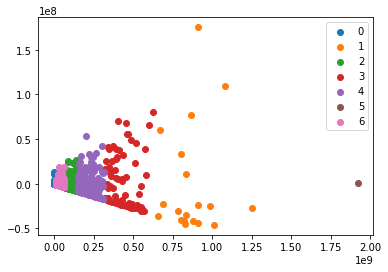

In [21]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [22]:
def find_out3(name, df):
    place = df[df['Name']== name].index
    print(place)
    df1 = df.drop(mylist, axis = 1)
    if len(place) != 0:#song in df['name'].values:
        df1 = df1.drop(place)
    df2 = df.drop(mylist, axis = 1)
    closest, _ = pairwise_distances_argmin_min(df2.iloc[place], df1)
    return df.iloc[closest[0]][['Name']]

In [23]:
find_out3("Abella Danger", df)

Int64Index([1], dtype='int64')


Name    MyKinkyDope
Name: 35, dtype: object

In [24]:
def find_k_closest(name, df):
    place = df[df['Name']== name].index
    #place = place.to_numpy().reshape(-1, 1)
    print(place)
    df1 = df.drop(mylist, axis = 1)
    if len(place) != 0:
        df1 = df1.drop(place)
    df2 = df.drop(mylist, axis = 1)
    distances = pairwise_distances(df2.iloc[place], df1, metric='euclidean')
    ind = [np.argpartition(i, 10)[:10] for i in distances]
    #print(ind)
    return [df.iloc[indexes] for indexes in ind][0]
    #closest = [df[indexes] for indexes in ind]

In [25]:
def find_k_closest_cos(name, df):
    place = df[df['Name']== name].index
    #place = place.to_numpy().reshape(-1, 1)
    print(place)
    df1 = df.drop(mylist, axis = 1)
    if len(place) != 0:
        df1 = df1.drop(place)
    df2 = df.drop(mylist, axis = 1)
    distances = pairwise_distances(df2.iloc[place], df1, metric = 'cosine')
    ind = [np.argpartition(i, 10)[:10] for i in distances]
    #print(ind)
    return [df.iloc[indexes] for indexes in ind][0]
    #closest = [df[indexes] for indexes in ind]

In [26]:
find_k_closest("Abella Danger", df)

Int64Index([1], dtype='int64')


,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Uploaded_by_actor,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown,Model_rank,Pornstar_rank,Pornstar_or_model
35,MyKinkyDope,Follow my onlyfans for more pics and vids only...,245000,194949120,37,44.0,2.0,0.0,1,0,0,1,23,-,10-Oct-97,-,-,to Present,1,"Miami, US",0,0,-,0,0,-,1,0,0,0,1,-,3,0,0,15901486.0,18389041,1,Irrelevant,0,-,-,-,1401,-,0.0,33.0,1.0
14,Lena Paul,Lena Paul is an amazing girl with an even more...,726000,374262867,15,47.0,77.0,0.0,1,0,1,0,27,Irish,12-Oct-93,"Florida, United States of America",-,2016 to Present,1,"SoCal, US",0,1,Grey,0,0,-,1,3,163,58,1,-,4,1,1,40495149.0,47353405,0,Libra,0,-,-,-,820,-,0.0,12.0,1.0
0,Lana Rhoades,Lana Rhoades is a Virgo born in September of 1...,14000000,903120820,1,26.0,6.0,0.0,1,0,0,1,24,-,6-Sep-96,"Chicago, Illinois, United States of America",-,to Present,1,"Los Angeles, US",0,1,-,0,0,-,1,1,165,52,1,-,3,2,0,121140882.0,192086347,0,Virgo,0,-,-,-,51,-,0.0,1.0,1.0
787,Giselle Palmer,Giselle Palmer is a hot slut with long blonde ...,315000,19255113,790,75.0,0.0,0.0,1,0,0,0,25,-,15-Feb-95,"Texas, United States of America",-,to Present,1,"Los Angeles, CA, US",0,1,-,0,0,-,1,3,173,61,1,-,1,2,0,1529387.0,1159634,1,Aquarius,0,-,-,-,28,-,0.0,640.0,1.0
64,Sasha Grey,Sasha Grey was born in 1988 in California. Tho...,500748,74585176,66,178.0,0.0,0.0,0,0,0,0,33,-,-,"Sacramento, California, United States of America",3/14/1988,-,0,-,0,0,-,0,0,-,1,0,168,50,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,49.0,1.0
5,Brandi Love,Brandi Love started her porno career at the ag...,626000,595530540,6,101.0,68.0,35.0,1,0,0,1,47,-,29-Mar-73,"Raleigh, North Carolina, United States of America",-,2007 to Present,1,"Wake Forest, US",0,1,-,0,1,-,1,3,170,57,1,I am an adrenaline junkie and love sports. Fro...,9,0,1,82587725.0,59004138,0,Aries,1,hateful and judgmental people. I do not like p...,People who exude sexual confidence. I like peo...,-,746,Detroit,0.0,6.0,1.0
472,Stoya,Thereâ€™s something about a pale white girlâ€™...,140000,36965957,475,9.0,0.0,0.0,1,0,0,0,34,-,15-Jun-86,"Wilmington, North Carolina, United States of A...",-,2007 to 2011,0,-,0,1,-,0,0,-,1,2,170,57,1,-,2,2,1,13612432.0,1761400,1,Gemini,0,-,-,-,14,-,0.0,394.0,1.0
874,Aimi Yoshikawa,-,31137,311590,877,2.0,0.0,0.0,0,0,0,0,24,-,-,-,-,-,0,-,0,0,-,0,0,-,1,0,0,0,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,697.0,1.0
346,Bruce Venture,"Every now and then, a big dick comes along tha...",557000,788909318,349,20.0,5.0,0.0,1,0,0,0,35,American,13-Nov-85,United States of America,-,2010 to Present,1,"Las Vegas, NV, US",5,1,Hazel,1,0,Cut,2,1,188,84,2,Looking for tested (or willing to test) female...,1,0,0,12125895.0,5384391,1,Scorpio,0,-,-,-,54,-,0.0,288.0,1.0
974,AsianGoodGirl,It's not easy to fulfill an Asian girl's fanta...,934000,47408714,977,86.0,3.0,0.0,0,1,0,0,27,-,20-Jul-93,-,-,-,0,-,0,4,-,0,0,-,3,2,165,50,1,"Cooking, exploring the world, camping, reading...",2,0,1,0.0,5724569,2,Irrelevant,0,-,Spit. Cock. Slapping balls. Watching other gir...,"47,408,714",448,-,190.0,0.0,0.0


In [27]:
find_k_closest_cos("Abella Danger", df)

Int64Index([1], dtype='int64')


,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Uploaded_by_actor,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown,Model_rank,Pornstar_rank,Pornstar_or_model
218,Kawaii Girl,Hey Kawaii_girl here (call me KG or Kawaii for...,442000,248107678,221,335.0,66.0,0.0,1,0,0,0,27,Latin,22-Feb-93,-,-,2015 to Present,1,"Earth, US",0,2,Brown,0,0,-,3,0,155,48,1,-,5,0,1,6608276.0,16925592,2,Irrelevant,1,-,-,-,910,-,0.0,183.0,1.0
622,Jasmine James,London has some of the best sluts in the world...,140533,21053595,625,28.0,0.0,0.0,0,0,0,0,31,-,-,"London, England",4/14/1990,-,0,-,0,0,-,0,0,-,1,0,163,60,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,512.0,1.0
1016,Tommy Gunn,"Hello, ladies. Get ready for a full spray of c...",19887,382947810,1019,391.0,0.0,0.0,0,0,0,0,54,-,-,"Cherry Hill, New Jersey, United States of America",5/13/1967,-,0,-,0,0,-,0,0,-,1,0,173,83,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,825.0,1.0
8613,AinsleeDivine,I'm an award winning cam model performing dail...,32000,133469,8633,2.0,0.0,0.0,0,1,0,0,47,-,23-Nov-73,-,-,-,0,"Fountain Hills, United States",0,0,-,0,0,-,1,0,0,0,1,"I love golf, traveling, laying outside in the ...",4,0,0,0.0,113457,2,Irrelevant,0,-,-,"133,469",37,-,3301.0,0.0,0.0
56,Leah Gotti,Baby-faced Leah Gotti is a serious smarty-pant...,424000,156635189,58,66.0,0.0,0.0,1,0,0,0,24,American,4-Dec-96,"Dallas, Texas, United States of America",-,2016 to Present,1,"Texas, US",0,0,Green,0,0,-,1,1,163,57,0,-,5,2,1,41791083.0,4818420,2,Libra,1,-,-,-,4,-,0.0,52.0,1.0
1113,Stella Raee,-,27944,40834266,1116,19.0,0.0,0.0,0,0,0,0,24,-,-,-,-,-,0,-,0,0,-,0,0,-,1,0,0,0,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,891.0,1.0
135,Katrina Jade,If you assume just because Katrina Jade was bo...,130112,192045717,138,263.0,0.0,0.0,0,0,0,0,30,-,-,United States of America,5/30/1991,-,0,-,0,0,-,0,0,-,1,0,165,57,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,116.0,1.0
113,Veronica Rodriguez,What can we say about Veronica Rodriguez that ...,327384,310838222,116,253.0,0.0,0.0,0,0,0,0,30,-,-,Venezuela,8/1/1991,-,0,-,0,0,-,0,0,-,1,0,160,45,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,103.0,1.0
8862,Chloe Blue,-,2215,2414996,8882,7.0,0.0,0.0,0,0,0,0,24,-,-,-,-,-,0,-,0,0,-,0,0,-,1,0,0,0,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,5423.0,1.0
136,Kyle Balls WCA,-,152000,199247869,139,330.0,0.0,0.0,1,0,0,0,33,-,8-May-87,-,-,to Present,1,"Las Vegas, US",0,0,-,0,0,-,2,0,0,0,2,-,5,0,0,16409330.0,21426157,0,Irrelevant,0,-,-,-,553,-,0.0,124.0,1.0


In [28]:
find_k_closest("Lana Rhoades", df)

Int64Index([0], dtype='int64')


,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Uploaded_by_actor,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown,Model_rank,Pornstar_rank,Pornstar_or_model
14,Lena Paul,Lena Paul is an amazing girl with an even more...,726000,374262867,15,47.0,77.0,0.0,1,0,1,0,27,Irish,12-Oct-93,"Florida, United States of America",-,2016 to Present,1,"SoCal, US",0,1,Grey,0,0,-,1,3,163,58,1,-,4,1,1,40495149.0,47353405,0,Libra,0,-,-,-,820,-,0.0,12.0,1.0
0,Lana Rhoades,Lana Rhoades is a Virgo born in September of 1...,14000000,903120820,1,26.0,6.0,0.0,1,0,0,1,24,-,6-Sep-96,"Chicago, Illinois, United States of America",-,to Present,1,"Los Angeles, US",0,1,-,0,0,-,1,1,165,52,1,-,3,2,0,121140882.0,192086347,0,Virgo,0,-,-,-,51,-,0.0,1.0,1.0
1,Abella Danger,"Danger might be her last name, but when it com...",868000,862007676,2,3.0,0.0,0.0,1,0,1,1,19,-,1-Jan-01,"Miami, Florida, United States of America",-,to Present,1,"Los Angeles, US",0,1,-,0,0,-,1,1,163,59,1,-,1,1,0,71825882.0,102153809,1,Scorpio,0,-,-,-,17,-,0.0,2.0,1.0
35,MyKinkyDope,Follow my onlyfans for more pics and vids only...,245000,194949120,37,44.0,2.0,0.0,1,0,0,1,23,-,10-Oct-97,-,-,to Present,1,"Miami, US",0,0,-,0,0,-,1,0,0,0,1,-,3,0,0,15901486.0,18389041,1,Irrelevant,0,-,-,-,1401,-,0.0,33.0,1.0
64,Sasha Grey,Sasha Grey was born in 1988 in California. Tho...,500748,74585176,66,178.0,0.0,0.0,0,0,0,0,33,-,-,"Sacramento, California, United States of America",3/14/1988,-,0,-,0,0,-,0,0,-,1,0,168,50,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,49.0,1.0
119,Ms London,Ms London is one of the hottest rising ebony p...,665000,54824760,122,46.0,2.0,0.0,1,0,0,0,26,-,27-Dec-93,United States of America,-,2017 to Present,1,"Los Angeles, US",0,3,Hazel,0,1,-,1,2,0,0,1,Shopping Mediating Reading-,3,0,1,2936248.0,5406950,1,Capricorn,1,-,-,-,207,-,0.0,97.0,1.0
472,Stoya,Thereâ€™s something about a pale white girlâ€™...,140000,36965957,475,9.0,0.0,0.0,1,0,0,0,34,-,15-Jun-86,"Wilmington, North Carolina, United States of A...",-,2007 to 2011,0,-,0,1,-,0,0,-,1,2,170,57,1,-,2,2,1,13612432.0,1761400,1,Gemini,0,-,-,-,14,-,0.0,394.0,1.0
787,Giselle Palmer,Giselle Palmer is a hot slut with long blonde ...,315000,19255113,790,75.0,0.0,0.0,1,0,0,0,25,-,15-Feb-95,"Texas, United States of America",-,to Present,1,"Los Angeles, CA, US",0,1,-,0,0,-,1,3,173,61,1,-,1,2,0,1529387.0,1159634,1,Aquarius,0,-,-,-,28,-,0.0,640.0,1.0
346,Bruce Venture,"Every now and then, a big dick comes along tha...",557000,788909318,349,20.0,5.0,0.0,1,0,0,0,35,American,13-Nov-85,United States of America,-,2010 to Present,1,"Las Vegas, NV, US",5,1,Hazel,1,0,Cut,2,1,188,84,2,Looking for tested (or willing to test) female...,1,0,0,12125895.0,5384391,1,Scorpio,0,-,-,-,54,-,0.0,288.0,1.0
974,AsianGoodGirl,It's not easy to fulfill an Asian girl's fanta...,934000,47408714,977,86.0,3.0,0.0,0,1,0,0,27,-,20-Jul-93,-,-,-,0,-,0,4,-,0,0,-,3,2,165,50,1,"Cooking, exploring the world, camping, reading...",2,0,1,0.0,5724569,2,Irrelevant,0,-,Spit. Cock. Slapping balls. Watching other gir...,"47,408,714",448,-,190.0,0.0,0.0


In [29]:
find_k_closest_cos("Lana Rhoades", df)

Int64Index([0], dtype='int64')


,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Uploaded_by_actor,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown,Model_rank,Pornstar_rank,Pornstar_or_model
560,Pristine Edge,"Tragically, teeny-tiny pornstar Pristine Edge ...",92116,106573865,563,63.0,0.0,0.0,0,0,0,0,34,-,-,"Florida, United States of America",10/13/1987,-,0,-,0,0,-,0,0,-,1,0,160,47,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,457.0,1.0
276,Shinaryen,Follow me on my onlyfans.com/shinaryen and twi...,297000,82234848,279,102.0,38.0,474.0,0,1,0,0,20,-,4-May-00,-,-,-,0,"Tallinn, Estonia",0,1,-,0,0,-,3,4,170,45,1,Sex and gaming!,4,0,0,0.0,8162082,1,Irrelevant,0,-,-,"82,234,848",574,-,45.0,0.0,0.0
48,Little Caprice,You wouldnâ€™t be a total idiot if you thought...,446000,245847727,50,111.0,0.0,65.0,1,0,0,0,32,Czech,26-Oct-88,"Prague, Czech Republic",-,2009 to Present,1,"Brno, CZ",0,0,Brown,0,0,-,1,1,170,48,1,"Sport, reading, traveling, animals ( cats ) & ...",4,1,1,33711891.0,28483620,0,Scorpio,0,-,"Love, passion, share partner, get fucked from ...",-,633,-,0.0,43.0,1.0
62,Cherie DeVille,"Cherie Deville is the type of MILF who, if she...",220000,361152919,64,111.0,206.0,0.0,1,0,0,0,42,American,30-Aug-78,"Durham, North Carolina, United States of America",-,2011 to Present,1,"LA, US",0,1,Blue,0,1,-,1,3,165,55,1,"xbox, swing dancing, surfing, and playing with...",3,2,0,18520295.0,21696502,2,Virgo,1,-,-,-,99,-,0.0,57.0,1.0
1712,Alexxa Vice,ALL MY PPV VIDEOS ARE INCLUDED IN MY FANCLUB S...,228000,18940164,1716,38.0,74.0,1719.0,1,0,0,0,28,British,2-Jul-92,"Yorkshire, England, United Kingdom",-,to Present,1,"Leeds, GB",0,1,Grey,0,1,-,1,0,168,0,1,"Star trek super Nerd, MTB rider, pub lover pet...",1,2,1,1087430.0,690816,1,Irrelevant,1,-,"Being used, objectified, degraded and humiliat...",-,234,-,0.0,1310.0,1.0
8313,Princess Kaelin,2020 AVN Nom for Favorite Domme. Cute but evil...,73000,32768,8331,0.0,58.0,0.0,0,1,0,0,27,-,5-Jan-93,-,-,-,0,"Always on ur mind, United States",0,0,-,0,0,-,1,0,0,0,1,-,3,0,0,0.0,225137,1,Irrelevant,0,-,-,"32,768",97,-,3121.0,0.0,0.0
1626,Selen,Selen is officially Italyâ€™s Favorite Porn St...,9949,559036,1630,2.0,0.0,0.0,0,0,0,0,55,-,-,"Rome, Italy",12/17/1966,-,0,-,0,0,-,0,0,-,1,0,163,49,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,1230.0,1.0
1034,Roberta Gemma,Hereâ€™s a real Italian piece of hotness who w...,263000,3204285,1037,5.0,0.0,0.0,1,0,0,0,40,-,15-Dec-80,"Rome, Italy",-,2005 to Present,1,"Rome, IT",0,1,-,0,0,-,1,1,168,61,1,motori e sesso-,4,0,1,2709802.0,1295783,0,Sagittarius,0,-,la trasgressione di buon gusto no al trash the...,-,347,-,0.0,822.0,1.0
2299,Toystest,Hi! My name is Anna! This profile is my sex di...,374000,17783978,2304,277.0,4.0,22.0,0,1,0,0,31,-,23-Jan-89,-,-,-,0,-,0,1,-,0,0,-,3,1,165,49,1,All kind of toys and everything that looks lik...,2,0,0,0.0,1274957,0,Irrelevant,0,Stupidity,"Cool porn art, watching porn, making porn )","17,783,978",427,-,541.0,0.0,0.0
1167,Alex Chance,Nature works in mysterious waysâ€¦ to some gir...,392000,32820152,1170,1.0,0.0,0.0,1,0,0,0,31,-,19-Apr-89,"Chesapeake, Virginia, United States of America",-,2011 to Present,1,"Los angeles, US",0,1,Green,0,0,-,1,1,173,70,1,-,3,0,0,1981331.0,1187783,1,Aries,0,-,-,-,53,"Chesapeake, VA",0.0,917.0,1.0


In [30]:
find_k_closest("LaSirena69", df)

Int64Index([12], dtype='int64')


,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Uploaded_by_actor,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown,Model_rank,Pornstar_rank,Pornstar_or_model
141,Luna Okko,-,331000,34099545,144,11.0,1.0,0.0,0,1,0,0,26,-,4-Dec-94,-,-,-,0,-,0,4,-,0,0,-,1,2,157,40,1,-,10,0,0,0.0,14019593,2,Irrelevant,1,-,-,"34,099,545",48,-,20.0,0.0,0.0
260,Bryci,Can you believe that 28G is a bra size? Wowza!...,496000,140247426,263,26.0,91.0,75.0,1,0,0,0,35,Canadian,13-Nov-85,Canada,-,2009 to Present,1,-,0,1,Brown,0,1,-,1,1,157,45,0,youtube.com/ourbellalife-,5,0,0,15455743.0,19038447,2,Sagittarius,0,"Rude people, cockiness, smart ass comments.",Knowing other people/couples love watching US!,-,68,-,0.0,218.0,1.0
248,Cherry Crush,Mycherrycrush.com --- Onlyfans.com/cherrycrush...,340000,87310927,251,42.0,22.0,0.0,1,0,0,0,29,-,1-Jul-91,"Miami, Florida, United States of America",-,to Present,1,"Miami, US",0,1,-,0,0,-,1,0,157,50,1,-,7,2,0,12147960.0,11728063,2,Cancer,0,-,-,-,749,-,0.0,200.0,1.0
340,Teacher of Magic,"Hello, my name is Eva. I am sorry but I don't ...",410000,373037393,343,230.0,7.0,19.0,0,1,0,0,40,-,26-Jan-80,-,-,-,0,-,0,0,-,0,0,-,1,0,170,71,1,-,4,0,0,0.0,20677179,0,Irrelevant,0,-,-,"373,037,393",2341,-,56.0,0.0,0.0
187,Emma Hix,Canadian pornstar Emma Hix started filming por...,152000,210625029,190,27.0,8.0,0.0,1,0,0,0,23,-,25-Oct-97,"Kelowna, British Columbia, Canada",-,to Present,1,"Los Angeles, US",0,1,-,0,0,-,1,3,165,45,1,-,2,2,0,8421057.0,9593852,1,Scorpio,0,-,-,-,96,-,0.0,152.0,1.0
159,Victoria Cakes,"Victoria Cakes was born in Memphis, Tennessee....",456000,30480415,162,4.0,0.0,0.0,1,0,0,0,30,-,15-Nov-90,United States of America,-,to Present,1,"Los Angeles, US",0,3,-,0,1,-,1,2,173,77,1,-,10,0,1,7338439.0,1371127,1,Virgo,1,-,-,-,223,-,0.0,128.0,1.0
113,Veronica Rodriguez,What can we say about Veronica Rodriguez that ...,327384,310838222,116,253.0,0.0,0.0,0,0,0,0,30,-,-,Venezuela,8/1/1991,-,0,-,0,0,-,0,0,-,1,0,160,45,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,103.0,1.0
201,Violet Starr,A brunette beauty who entered the biz at age 1...,144000,92250916,204,62.0,162.0,0.0,1,0,0,0,23,-,23-Dec-96,"Tampa, Florida, United States of America",-,to Present,1,-,0,1,-,0,0,-,1,1,165,0,1,My main focuses in life Making Porn Acting Myf...,1,0,0,7923045.0,8447274,1,Capricorn,0,"Over thinking and worrying, Not listening to h...",Kindness Compassion Intelligence DDLG BDSM Swi...,-,252,-,0.0,174.0,1.0
330,Molly Pills,I do a lot of adventuring. If youâ€™d like to ...,156000,26478515,333,80.0,73.0,252.0,0,1,1,0,25,-,2-May-95,United States of America,-,-,0,-,0,1,-,0,0,-,1,3,165,57,2,#1 Nature thot in the world!! I like to travel...,2,0,0,0.0,5809268,2,Irrelevant,0,-,My current favorite thing to indulge in is exh...,"26,478,515",414,-,57.0,0.0,0.0
1775,Nikki Sexx,"Sometimes, you just feel so low that you need ...",26349,23716897,1779,149.0,0.0,0.0,0,0,0,0,38,-,-,"California, United States of America",3/1/1983,-,0,-,0,0,-,0,0,-,1,0,175,77,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,1372.0,1.0


In [31]:
find_k_closest_cos("Lana Rhoades", df)

Int64Index([0], dtype='int64')


,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Uploaded_by_actor,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown,Model_rank,Pornstar_rank,Pornstar_or_model
560,Pristine Edge,"Tragically, teeny-tiny pornstar Pristine Edge ...",92116,106573865,563,63.0,0.0,0.0,0,0,0,0,34,-,-,"Florida, United States of America",10/13/1987,-,0,-,0,0,-,0,0,-,1,0,160,47,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,457.0,1.0
276,Shinaryen,Follow me on my onlyfans.com/shinaryen and twi...,297000,82234848,279,102.0,38.0,474.0,0,1,0,0,20,-,4-May-00,-,-,-,0,"Tallinn, Estonia",0,1,-,0,0,-,3,4,170,45,1,Sex and gaming!,4,0,0,0.0,8162082,1,Irrelevant,0,-,-,"82,234,848",574,-,45.0,0.0,0.0
48,Little Caprice,You wouldnâ€™t be a total idiot if you thought...,446000,245847727,50,111.0,0.0,65.0,1,0,0,0,32,Czech,26-Oct-88,"Prague, Czech Republic",-,2009 to Present,1,"Brno, CZ",0,0,Brown,0,0,-,1,1,170,48,1,"Sport, reading, traveling, animals ( cats ) & ...",4,1,1,33711891.0,28483620,0,Scorpio,0,-,"Love, passion, share partner, get fucked from ...",-,633,-,0.0,43.0,1.0
62,Cherie DeVille,"Cherie Deville is the type of MILF who, if she...",220000,361152919,64,111.0,206.0,0.0,1,0,0,0,42,American,30-Aug-78,"Durham, North Carolina, United States of America",-,2011 to Present,1,"LA, US",0,1,Blue,0,1,-,1,3,165,55,1,"xbox, swing dancing, surfing, and playing with...",3,2,0,18520295.0,21696502,2,Virgo,1,-,-,-,99,-,0.0,57.0,1.0
1712,Alexxa Vice,ALL MY PPV VIDEOS ARE INCLUDED IN MY FANCLUB S...,228000,18940164,1716,38.0,74.0,1719.0,1,0,0,0,28,British,2-Jul-92,"Yorkshire, England, United Kingdom",-,to Present,1,"Leeds, GB",0,1,Grey,0,1,-,1,0,168,0,1,"Star trek super Nerd, MTB rider, pub lover pet...",1,2,1,1087430.0,690816,1,Irrelevant,1,-,"Being used, objectified, degraded and humiliat...",-,234,-,0.0,1310.0,1.0
8313,Princess Kaelin,2020 AVN Nom for Favorite Domme. Cute but evil...,73000,32768,8331,0.0,58.0,0.0,0,1,0,0,27,-,5-Jan-93,-,-,-,0,"Always on ur mind, United States",0,0,-,0,0,-,1,0,0,0,1,-,3,0,0,0.0,225137,1,Irrelevant,0,-,-,"32,768",97,-,3121.0,0.0,0.0
1626,Selen,Selen is officially Italyâ€™s Favorite Porn St...,9949,559036,1630,2.0,0.0,0.0,0,0,0,0,55,-,-,"Rome, Italy",12/17/1966,-,0,-,0,0,-,0,0,-,1,0,163,49,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,1230.0,1.0
1034,Roberta Gemma,Hereâ€™s a real Italian piece of hotness who w...,263000,3204285,1037,5.0,0.0,0.0,1,0,0,0,40,-,15-Dec-80,"Rome, Italy",-,2005 to Present,1,"Rome, IT",0,1,-,0,0,-,1,1,168,61,1,motori e sesso-,4,0,1,2709802.0,1295783,0,Sagittarius,0,-,la trasgressione di buon gusto no al trash the...,-,347,-,0.0,822.0,1.0
2299,Toystest,Hi! My name is Anna! This profile is my sex di...,374000,17783978,2304,277.0,4.0,22.0,0,1,0,0,31,-,23-Jan-89,-,-,-,0,-,0,1,-,0,0,-,3,1,165,49,1,All kind of toys and everything that looks lik...,2,0,0,0.0,1274957,0,Irrelevant,0,Stupidity,"Cool porn art, watching porn, making porn )","17,783,978",427,-,541.0,0.0,0.0
1167,Alex Chance,Nature works in mysterious waysâ€¦ to some gir...,392000,32820152,1170,1.0,0.0,0.0,1,0,0,0,31,-,19-Apr-89,"Chesapeake, Virginia, United States of America",-,2011 to Present,1,"Los angeles, US",0,1,Green,0,0,-,1,1,173,70,1,-,3,0,0,1981331.0,1187783,1,Aries,0,-,-,-,53,"Chesapeake, VA",0.0,917.0,1.0


In [32]:
find_k_closest("MyKinkyDope", df)

Int64Index([35], dtype='int64')


,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Uploaded_by_actor,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Age,Background,Birthday,Birthplace,Born,Career Start and End,Career Status,City and Country,Endowment,Ethnicity,Eye Color,Facial Hair,Fake Boobs,Foreskin,Gender,Hair Color,Height,Weight,Interested in,Interests and hobbies,Joined,Measurements,Piercings,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown,Model_rank,Pornstar_rank,Pornstar_or_model
135,Katrina Jade,If you assume just because Katrina Jade was bo...,130112,192045717,138,263.0,0.0,0.0,0,0,0,0,30,-,-,United States of America,5/30/1991,-,0,-,0,0,-,0,0,-,1,0,165,57,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,116.0,1.0
175,Harley Dean,Harley Dean may be slightly new to the smut sc...,157000,141842966,178,58.0,0.0,0.0,1,0,0,0,26,-,5-Nov-94,"Florida, United States of America",-,2014 to Present,1,-,0,2,-,0,1,-,1,2,170,54,1,-,2,1,0,9645180.0,8667160,1,Gemini,0,-,-,-,1,-,0.0,150.0,1.0
519,Natalie Mars,Natalie Mars is a cute bookish-looking trans w...,100000,38428797,522,13.0,42.0,0.0,1,0,0,1,36,British,3-Feb-84,"Fort Lauderdale, Florida, United States of Ame...",-,2015 to Present,1,"Las Vegas, US",0,1,Green,0,0,-,0,1,168,61,1,-,3,2,0,3848070.0,5230114,1,Aquarius,0,-,-,-,44,-,0.0,416.0,1.0
76,Kelsi Monroe,The porno biz was trucking along just fine unt...,284129,202901722,78,212.0,0.0,0.0,0,0,0,0,27,-,-,"Florida, United States of America",1/1/1994,-,0,-,0,0,-,0,0,-,1,0,170,55,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,69.0,1.0
152,Richelle Ryan,Where to start with fiery Italian Richelle Rya...,111000,118006221,155,47.0,0.0,0.0,1,0,0,0,35,-,11-Jul-85,"New York, United States of America",-,2006 to Present,1,"Las Vegas, US",0,1,-,0,1,-,1,1,163,57,1,-,3,2,1,6715565.0,9220662,1,Cancer,1,-,-,-,173,-,0.0,140.0,1.0
92,Mandy Muse,Mandy Muse will inspire your sex juices to war...,254162,197548284,95,192.0,0.0,0.0,0,0,0,0,27,-,-,"San Diego, California, United States of America",10/18/1994,-,0,-,0,0,-,0,0,-,1,0,160,55,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,83.0,1.0
86,Krissy Lynn,Krissy Lynn is that kind of bubbly cheerleader...,229354,196931571,89,286.0,0.0,0.0,0,0,0,0,37,-,-,"Salt Lake City, Utah, United States of America",12/14/1984,-,0,-,0,0,-,0,0,-,1,0,160,57,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,79.0,1.0
144,Anissa Kate,"Oh France, what a land: flowing wine, extra ma...",157550,247276089,147,398.0,0.0,0.0,0,0,0,0,34,-,-,"Lyon, France",5/7/1987,-,0,-,0,0,-,0,0,-,1,0,163,51,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,121.0,1.0
169,Jayden James,"Hold on to your crotch rocket, boys, because t...",266787,138947670,172,450.0,0.0,0.0,0,0,0,0,35,-,-,"Upland, California, United States of America",2/13/1986,-,0,-,0,0,-,0,0,-,1,0,173,61,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,146.0,1.0
314,Veronica Leal,-,72820,54199017,317,145.0,0.0,0.0,0,0,0,0,24,-,-,-,-,-,0,-,0,0,-,0,0,-,1,0,0,0,0,-,0,0,0,0.0,0,0,Irrelevant,0,-,-,-,0,-,0.0,262.0,1.0


In [40]:
def find_k_closest_cos2(name, df):
    place = df[df['Name']== name].index
    #place = place.to_numpy().reshape(-1, 1)
    #print(place)
    df1 = df.drop(mylist, axis = 1)
    if len(place) != 0:
        df1 = df1.drop(place)
    df2 = df.drop(mylist, axis = 1)
    distances = pairwise_distances(df2.iloc[place], df1, metric = 'cosine')
    ind = [np.argpartition(i, 10)[:10] for i in distances]
    #print(ind)
    return [df[["Name", "Pornhub_rank"]].iloc[indexes] for indexes in ind][0]
    #closest = [df[indexes] for indexes in ind]

In [35]:
find_k_closest_cos2("MyKinkyDope", df)

Int64Index([35], dtype='int64')


,Name,Bio,Pornhub_rank
260,Bryci,Can you believe that 28G is a bra size? Wowza!...,263
397,Ava Taylor,"Check out little Ava Taylor, and try to deny t...",400
87,Eliza Ibarra,Onlyfans.com/ElizaIbarra Come play with me on ...,90
9,Cory Chase,"You canâ€™t always judge a book by its cover, ...",10
200,Sasha Rose,There are a lot of stereotypes about Russia be...,203
532,Nala Brooks,check out my onlyfans for a lot more (: Onlyfa...,535
201,Violet Starr,A brunette beauty who entered the biz at age 1...,204
1584,Mrs Robinson,If you enjoy my free vids then please comment ...,1588
10323,Casey Northman,-,10350
50,Lexi Lore,"Individual porn producer, webcam model, and Yo...",52


In [42]:
dick = {}
#top_20 = []
for name in df["Name"][:20]:
    #top_20.append(name)
    dick[name] = list(find_k_closest_cos2(name, df).values)
print(top_20)
print(dick)

['Lana Rhoades', 'Abella Danger', 'Riley Reid', 'Eva Elfie', 'Mia Malkova', 'Brandi Love', 'Mia Khalifa', 'Nicole Aniston', 'Angela White', 'Cory Chase', 'Mini Diva', 'Jordi El Nino Polla', 'LaSirena69', 'Emily Willis', 'Lena Paul', 'Adriana Chechik', 'Autumn Falls', 'Leolulu', 'Alex Adams', 'yinyleon']
{'Lana Rhoades': [array(['Pristine Edge', 563], dtype=object), array(['Shinaryen', 279], dtype=object), array(['Little Caprice', 50], dtype=object), array(['Cherie DeVille', 64], dtype=object), array(['Alexxa Vice', 1716], dtype=object), array(['Princess Kaelin', 8331], dtype=object), array(['Selen', 1630], dtype=object), array(['Roberta Gemma', 1037], dtype=object), array(['Toystest', 2304], dtype=object), array(['Alex Chance', 1170], dtype=object)], 'Abella Danger': [array(['Kawaii Girl', 221], dtype=object), array(['Jasmine James', 625], dtype=object), array(['Tommy Gunn', 1019], dtype=object), array(['AinsleeDivine', 8633], dtype=object), array(['Leah Gotti', 58], dtype=object), arr

In [43]:
print(dick['Jordi El Nino Polla'])

[array(['Jada Stevens', 169], dtype=object), array(['Alix Lynx', 253], dtype=object), array(['Nat Turnher', 2188], dtype=object), array(['Dani Daniels', 34], dtype=object), array(['Danika Mori', 38], dtype=object), array(['fap2it', 931], dtype=object), array(['Yanny Yummy', 5849], dtype=object), array(['Kiara Mia', 518], dtype=object), array(['Iris Rose', 3161], dtype=object), array(['Chanel Skye', 2857], dtype=object)]


In [45]:
dick = {}
#top_20 = []
for name in df["Name"]:
    #top_20.append(name)
    dick[name] = list(find_k_closest_cos2(name, df).values)
with open('rec_list.pkl','wb') as file: 
    pickle.dump(dick, file)

In [ ]:
with open('rec_list.pkl','rb') as file: 
    dick = pickle.load(file)

from sklearn.neighbors import NearestNeighbors

def find_k_closest(name, df):
    place = df[df['Name']== name].index
    df = df.drop(mylist, axis = 1)
    nns = {}
    neighbors = NearestNeighbors(n_neighbors=3).fit(df)
    nns[name] = neighbors.kneighbors(name, return_distance=false)
    return nns